# Text generation using Transformers and Hugging Face 

## Credits: https://github.com/raghavbali/text_generation/blob/master/notebooks/text_generation_03.ipynb

### Install Transformers

In [1]:
!pip install transformers

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


### Import Libraries

In [2]:
import tensorflow as tf
import transformers
from numpy import random
from transformers import (TFGPT2LMHeadModel,
                          GPT2Tokenizer,
                          GPT2Config)

In [3]:
## Importing Libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
#import en_core_web_sm
#nlp = en_core_web_sm.load()
nlp = spacy.load('en',disable=['parser', 'tagger','ner'])
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump,load
import tensorflow as tf
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to /Users/sumedha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sumedha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Model Setup

In [4]:
model_name = "gpt2-medium"
config = GPT2Config.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = TFGPT2LMHeadModel.from_pretrained(model_name, config=config)

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2-medium.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


### Generate Text

In [5]:
# encode context the generation is conditioned on
input_ids = tokenizer.encode('Watson you are', return_tensors='tf')
input_ids

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[   54, 13506,   345,   389]], dtype=int32)>

#### Greedy Decoding

In [6]:
# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=25)

print("Output:\n" + 110 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


Output:
--------------------------------------------------------------------------------------------------------------
Watson you are a great guy and I hope you are doing well. I am sorry to hear that you are not able


In [7]:
t1 = "Watson you are a great guy and I hope you are doing well. I am sorry to hear that you are not able"

In [8]:
len(set(t1.split()))

18

In [9]:
print(t1)

Watson you are a great guy and I hope you are doing well. I am sorry to hear that you are not able


In [10]:
f25 =  open("generated_script25.txt","w")
f25.write(t1)
f25.close()

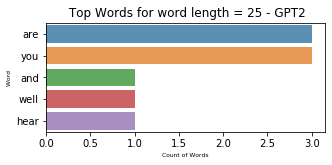

In [11]:
t25 = open("generated_script25.txt", 'rb').read().decode(encoding='utf-8')
sentences25 = sent_tokenize(t25)
tokenizer25 = RegexpTokenizer('[A-Za-z]\w+')
tokens25=tokenizer25.tokenize(t25)
df25 = pd.DataFrame(tokens25)
df25 = df25[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df25:
    freqdoctor[words] += 1
df25 = df25[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df25.values, df25.index, alpha=0.8)
plt.title(' Top Words for word length = 25 - GPT2')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [12]:
# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=50)

print("Output:\n" + 110 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


Output:
--------------------------------------------------------------------------------------------------------------
Watson you are a great guy and I hope you are doing well. I am sorry to hear that you are not able to attend the upcoming event. I hope you will be able to attend the next one. I am sorry to hear that you


In [13]:
t2 = "Watson you are a great guy and I hope you are doing well. I am sorry to hear that you are not able to attend the upcoming event. I hope you will be able to attend the next one. I am sorry to hear that you"

In [14]:
len(set(t2.split()))

26

In [15]:
f50_pone =  open("generated_script50_pone.txt","w")
f50_pone.write(t2)
f50_pone.close()

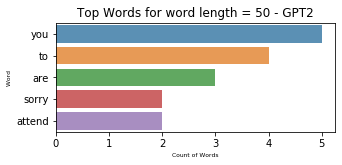

In [16]:
t50_pone = open("generated_script50_pone.txt", 'rb').read().decode(encoding='utf-8')
sentences50_pone = sent_tokenize(t50_pone)
tokenizer50_pone = RegexpTokenizer('[A-Za-z]\w+')
tokens50_pone=tokenizer50_pone.tokenize(t50_pone)
df50_pone = pd.DataFrame(tokens50_pone)
df50_pone = df50_pone[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df50_pone:
    freqdoctor[words] += 1
df50_pone = df50_pone[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df50_pone.values, df50_pone.index, alpha=0.8)
plt.title('Top Words for word length = 50 - GPT2')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [17]:
# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=75)

print("Output:\n" + 110 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


Output:
--------------------------------------------------------------------------------------------------------------
Watson you are a great guy and I hope you are doing well. I am sorry to hear that you are not able to attend the upcoming event. I hope you will be able to attend the next one. I am sorry to hear that you are not able to attend the upcoming event. I hope you will be able to attend the next one.

Anonymous 01


In [18]:
t3 = "Watson you are a great guy and I hope you are doing well. I am sorry to hear that you are not able to attend the upcoming event. I hope you will be able to attend the next one. I am sorry to hear that you are not able to attend the upcoming event. I hope you will be able to attend the next one."

In [19]:
len(set(t3.split()))

26

In [20]:
f75_pone =  open("generated_script75_pone.txt","w")
f75_pone.write(t3)
f75_pone.close()

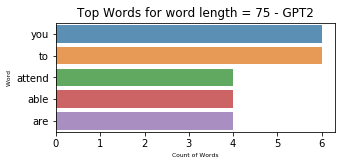

In [21]:
t75_pone = open("generated_script75_pone.txt", 'rb').read().decode(encoding='utf-8')
sentences75_pone = sent_tokenize(t75_pone)
tokenizer75_pone = RegexpTokenizer('[A-Za-z]\w+')
tokens75_pone=tokenizer75_pone.tokenize(t75_pone)
df75_pone = pd.DataFrame(tokens75_pone)
df75_pone = df75_pone[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df75_pone:
    freqdoctor[words] += 1
df75_pone = df75_pone[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df75_pone.values, df75_pone.index, alpha=0.8)
plt.title('Top Words for word length = 75 - GPT2')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [22]:
# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=100)

print("Output:\n" + 110 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


Output:
--------------------------------------------------------------------------------------------------------------
Watson you are a great guy and I hope you are doing well. I am sorry to hear that you are not able to attend the upcoming event. I hope you will be able to attend the next one. I am sorry to hear that you are not able to attend the upcoming event. I hope you will be able to attend the next one.

Anonymous 01/28/16 (Wed) 01:29:55 PM No. 96545 >>96545

I


In [23]:
t4 = "Watson you are in an accident? Pam: Oh yes, and I would tell you, but I'm the only one around who can see me. So you know, it's not an accident, I am at the place where I am, so you know I'm still in an accident. Watson: Are you sure that's what you're saying?Pam:Yes sir Pam Watson: I dont think you are saying all"

In [24]:
len(set(t4.split()))

51

In [25]:
f100_pone =  open("generated_script100_pone.txt","w")
f100_pone.write(t4)
f100_pone.close()

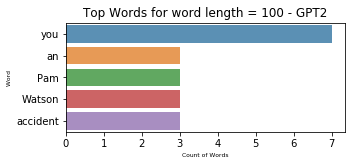

In [26]:
t100_pone = open("generated_script100_pone.txt", 'rb').read().decode(encoding='utf-8')
sentences100_pone = sent_tokenize(t100_pone)
tokenizer100_pone = RegexpTokenizer('[A-Za-z]\w+')
tokens100_pone=tokenizer100_pone.tokenize(t100_pone)
df100_pone = pd.DataFrame(tokens100_pone)
df100_pone = df100_pone[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df100_pone:
    freqdoctor[words] += 1
df100_pone = df100_pone[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df100_pone.values, df100_pone.index, alpha=0.8)
plt.title('Top Words for word length = 100 - GPT2')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [27]:
tf.random.set_seed(0)

# Use a combination of decoding techniques
sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=100, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=5
)

#print("Output:\n" + 110 * '-')
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
    print("-"*110)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


0: Watson you are in an accident?

Pam: Oh yes, and I would tell you, but I'm the only one around who can see me. So you know, it's not an accident, I am at the place where I am, so you know I'm still in an accident." Watson: "Are you sure that's what you're saying?"

Pam: "Yes sir."

Pam Watson: "I don't think you're saying all
--------------------------------------------------------------------------------------------------------------
1: Watson you are the greatest football fan ever, what can you say in your defence?

"I could probably give you one reason why I love being a fan of rugby union so much.

"I'm not going to pretend to agree with most of their players, and some players are a bit weird when it comes to the whole thing but they still love their sport so I'm sure this is just a silly way of saying they love football to some degree but I'm going to
--------------------------------------------------------------------------------------------------------------
2: Watson you are

In [28]:
tf.random.set_seed(0)

# Use a combination of decoding techniques
sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=25, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=5
)

print("Output:\n" + 110 * '-')
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
    print("-"*110)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


Output:
--------------------------------------------------------------------------------------------------------------
0: Watson you are in an accident?

Pam: Oh yes, and I would tell you, but I'm
--------------------------------------------------------------------------------------------------------------
1: Watson you are the greatest football fan ever, what can you say in your defence?

"I could probably give
--------------------------------------------------------------------------------------------------------------
2: Watson you are no longer allowed to leave your job but your job does not matter. He tells me that his only aim
--------------------------------------------------------------------------------------------------------------
3: Watson you are very well. Now you are saying that you would not get away with not getting away with the stuff.
--------------------------------------------------------------------------------------------------------------
4: Watson you are an id

In [29]:
tf.random.set_seed(0)

# Use a combination of decoding techniques
sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=50, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=5
)

print("Output:\n" + 110 * '-')
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
    print("-"*110)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


Output:
--------------------------------------------------------------------------------------------------------------
0: Watson you are in an accident?

Pam: Oh yes, and I would tell you, but I'm the only one around who can see me. So you know, it's not an accident, I am at the place where
--------------------------------------------------------------------------------------------------------------
1: Watson you are the greatest football fan ever, what can you say in your defence?

"I could probably give you one reason why I love being a fan of rugby union so much.

"I'm not going to pretend to
--------------------------------------------------------------------------------------------------------------
2: Watson you are no longer allowed to leave your job but your job does not matter. He tells me that his only aim is to get people to know and respect his intelligence; this is important for a successful company, otherwise he doesn't understand his
-------------------------------------

In [30]:
tf.random.set_seed(0)

# Use a combination of decoding techniques
sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=75, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=5
)

print("Output:\n" + 110 * '-')
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
    print("-"*110)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


Output:
--------------------------------------------------------------------------------------------------------------
0: Watson you are in an accident?

Pam: Oh yes, and I would tell you, but I'm the only one around who can see me. So you know, it's not an accident, I am at the place where I am, so you know I'm still in an accident." Watson: "Are you sure that's what you're saying
--------------------------------------------------------------------------------------------------------------
1: Watson you are the greatest football fan ever, what can you say in your defence?

"I could probably give you one reason why I love being a fan of rugby union so much.

"I'm not going to pretend to agree with most of their players, and some players are a bit weird when it comes to the whole thing but they still love
--------------------------------------------------------------------------------------------------------------
2: Watson you are no longer allowed to leave your job but your job does n

In [31]:
tf.random.set_seed(0)

# Use a combination of decoding techniques
sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=100, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=5
)

print("Output:\n" + 110 * '-')
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
    print("-"*110)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


Output:
--------------------------------------------------------------------------------------------------------------
0: Watson you are in an accident?

Pam: Oh yes, and I would tell you, but I'm the only one around who can see me. So you know, it's not an accident, I am at the place where I am, so you know I'm still in an accident." Watson: "Are you sure that's what you're saying?"

Pam: "Yes sir."

Pam Watson: "I don't think you're saying all
--------------------------------------------------------------------------------------------------------------
1: Watson you are the greatest football fan ever, what can you say in your defence?

"I could probably give you one reason why I love being a fan of rugby union so much.

"I'm not going to pretend to agree with most of their players, and some players are a bit weird when it comes to the whole thing but they still love their sport so I'm sure this is just a silly way of saying they love football to some degree but I'm going to
---------

In [ ]:
\